Getting the data 

In [146]:
!pip install theano

You are using pip version 18.0, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/bridges/bridges.data.version1

--2019-04-09 04:59:13--  https://archive.ics.uci.edu/ml/machine-learning-databases/bridges/bridges.data.version1
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6128 (6.0K) [application/x-httpd-php]
Saving to: 'bridges.data.version1'

bridges.data.versio 100%[===================>]   5.98K  --.-KB/s    in 0s      

2019-04-09 04:59:14 (69.1 MB/s) - 'bridges.data.version1' saved [6128/6128]



In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/bridges/bridges.data.version2

--2019-04-09 04:59:26--  https://archive.ics.uci.edu/ml/machine-learning-databases/bridges/bridges.data.version2
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6494 (6.3K) [application/x-httpd-php]
Saving to: 'bridges.data.version2'

bridges.data.versio 100%[===================>]   6.34K  --.-KB/s    in 0s      

2019-04-09 04:59:26 (137 MB/s) - 'bridges.data.version2' saved [6494/6494]



In [7]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/bridges/bridges.names

--2019-04-09 05:01:25--  https://archive.ics.uci.edu/ml/machine-learning-databases/bridges/bridges.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4436 (4.3K) [application/x-httpd-php]
Saving to: 'bridges.names'

bridges.names       100%[===================>]   4.33K  --.-KB/s    in 0s      

2019-04-09 05:01:26 (108 MB/s) - 'bridges.names' saved [4436/4436]



In [179]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt 

In [180]:
column_names = ["IDENTIF" , "RIVER" , "LOCATION" , "ERECTED" , "PURPOSE" , "LENGTH" , "LANES" , "CLEAR-G" , "T-OR-D" ,
               "MATERIAL" , "SPAN" , "REL-L" , "TYPE"]

Data = pd.read_csv("bridges.data.version2" , sep = "," , header = None , names = column_names)

Data.head()

,IDENTIF,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
0,E1,M,3,CRAFTS,HIGHWAY,?,2,N,THROUGH,WOOD,SHORT,S,WOOD
1,E2,A,25,CRAFTS,HIGHWAY,MEDIUM,2,N,THROUGH,WOOD,SHORT,S,WOOD
2,E3,A,39,CRAFTS,AQUEDUCT,?,1,N,THROUGH,WOOD,?,S,WOOD
3,E5,A,29,CRAFTS,HIGHWAY,MEDIUM,2,N,THROUGH,WOOD,SHORT,S,WOOD
4,E6,M,23,CRAFTS,HIGHWAY,?,2,N,THROUGH,WOOD,?,S,WOOD


In [181]:
Data.describe()

,IDENTIF,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
count,108,108,108,108,108,108,108,108,108,108,108,108,108
unique,108,4,55,4,4,4,5,3,3,4,4,4,8
top,E85,A,39,MATURE,HIGHWAY,MEDIUM,2,G,THROUGH,STEEL,MEDIUM,F,SIMPLE-T
freq,1,49,5,54,71,48,61,80,87,79,53,58,44


In [182]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 13 columns):
IDENTIF     108 non-null object
RIVER       108 non-null object
LOCATION    108 non-null object
ERECTED     108 non-null object
PURPOSE     108 non-null object
LENGTH      108 non-null object
LANES       108 non-null object
CLEAR-G     108 non-null object
T-OR-D      108 non-null object
MATERIAL    108 non-null object
SPAN        108 non-null object
REL-L       108 non-null object
TYPE        108 non-null object
dtypes: object(13)
memory usage: 11.0+ KB


In [183]:
Data.isna().any()

IDENTIF     False
RIVER       False
LOCATION    False
ERECTED     False
PURPOSE     False
LENGTH      False
LANES       False
CLEAR-G     False
T-OR-D      False
MATERIAL    False
SPAN        False
REL-L       False
TYPE        False
dtype: bool

In [184]:
Data.isnull().any()

IDENTIF     False
RIVER       False
LOCATION    False
ERECTED     False
PURPOSE     False
LENGTH      False
LANES       False
CLEAR-G     False
T-OR-D      False
MATERIAL    False
SPAN        False
REL-L       False
TYPE        False
dtype: bool

In [185]:
print(len(set(Data["RIVER"])))
print(len(set(Data["LOCATION"])))
print(len(set(Data["ERECTED"])))
print(len(set(Data["PURPOSE"])))
print(len(set(Data["LENGTH"])))
print(len(set(Data["LANES"])))
print(len(set(Data["CLEAR-G"])))
print(len(set(Data["T-OR-D"])))
print(len(set(Data["MATERIAL"])))
print(len(set(Data["SPAN"])))
print(len(set(Data["REL-L"])))

set(Data["TYPE"])

4
55
4
4
4
5
3
3
4
4
4


{'?', 'ARCH', 'CANTILEV', 'CONT-T', 'NIL', 'SIMPLE-T', 'SUSPEN', 'WOOD'}

In [186]:
Data = Data[Data.TYPE != "?"]

In [187]:
set(Data["TYPE"])

{'ARCH', 'CANTILEV', 'CONT-T', 'NIL', 'SIMPLE-T', 'SUSPEN', 'WOOD'}

In [188]:
print(Data.shape)

(106, 13)


In [189]:
Data.head()

,IDENTIF,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
0,E1,M,3,CRAFTS,HIGHWAY,?,2,N,THROUGH,WOOD,SHORT,S,WOOD
1,E2,A,25,CRAFTS,HIGHWAY,MEDIUM,2,N,THROUGH,WOOD,SHORT,S,WOOD
2,E3,A,39,CRAFTS,AQUEDUCT,?,1,N,THROUGH,WOOD,?,S,WOOD
3,E5,A,29,CRAFTS,HIGHWAY,MEDIUM,2,N,THROUGH,WOOD,SHORT,S,WOOD
4,E6,M,23,CRAFTS,HIGHWAY,?,2,N,THROUGH,WOOD,?,S,WOOD


In [190]:
Data = Data.drop(['IDENTIF'] , axis = 1)
Data = Data.drop(['LOCATION'] , axis = 1)

In [191]:
Data.head()

,RIVER,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
0,M,CRAFTS,HIGHWAY,?,2,N,THROUGH,WOOD,SHORT,S,WOOD
1,A,CRAFTS,HIGHWAY,MEDIUM,2,N,THROUGH,WOOD,SHORT,S,WOOD
2,A,CRAFTS,AQUEDUCT,?,1,N,THROUGH,WOOD,?,S,WOOD
3,A,CRAFTS,HIGHWAY,MEDIUM,2,N,THROUGH,WOOD,SHORT,S,WOOD
4,M,CRAFTS,HIGHWAY,?,2,N,THROUGH,WOOD,?,S,WOOD


In [192]:
# Finding out the columns with "?" values 

columns = list(Data.columns)

for col in columns:
    for i in Data[col]:
        if i == "?":
            print(col)
            break

LENGTH
LANES
CLEAR-G
T-OR-D
SPAN
REL-L


In [193]:
import operator 

def GetMostOccuring(column):
    vals = list(set(column))
    dic = {}
    
    for i in vals :
        dic[i] = Occurance(column , i)
        
    del dic["?"]
    
    return max(dic.items(), key=operator.itemgetter(1))[0]
        
def Occurance(col , i):
    occ = 0
    for j in col :
        if j == i :
            occ = occ + 1 
    return occ

In [194]:
# Lets find out occurances of "?" in the dataset and replace them with Mode

Data['LENGTH'].replace(to_replace="?", value=GetMostOccuring(Data['LENGTH']), inplace = True)

Data['LANES'].replace(to_replace="?", value=GetMostOccuring(Data['LANES']), inplace = True)

Data['CLEAR-G'].replace(to_replace="?", value=GetMostOccuring(Data['CLEAR-G']), inplace = True)

Data['T-OR-D'].replace(to_replace="?", value=GetMostOccuring(Data['T-OR-D']), inplace = True)

Data['SPAN'].replace(to_replace="?", value=GetMostOccuring(Data['SPAN']), inplace = True)

Data['REL-L'].replace(to_replace="?", value=GetMostOccuring(Data['REL-L']), inplace = True)

In [195]:
# Finding out the columns with "?" values 

columns = list(Data.columns)

for col in columns:
    for i in Data[col]:
        if i == "?":
            print(col)
            break
            
# All the "?" have been filled 

In [196]:
Data.head()

,RIVER,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
0,M,CRAFTS,HIGHWAY,MEDIUM,2,N,THROUGH,WOOD,SHORT,S,WOOD
1,A,CRAFTS,HIGHWAY,MEDIUM,2,N,THROUGH,WOOD,SHORT,S,WOOD
2,A,CRAFTS,AQUEDUCT,MEDIUM,1,N,THROUGH,WOOD,MEDIUM,S,WOOD
3,A,CRAFTS,HIGHWAY,MEDIUM,2,N,THROUGH,WOOD,SHORT,S,WOOD
4,M,CRAFTS,HIGHWAY,MEDIUM,2,N,THROUGH,WOOD,MEDIUM,S,WOOD


In [197]:
Data['LANES'] = Data['LANES'].astype(np.float32)

In [198]:
from sklearn.preprocessing import LabelEncoder 

Encoder = LabelEncoder()

obj_columns = ['RIVER' , 'ERECTED' , 'PURPOSE' , 'LENGTH' , 'CLEAR-G' , 'T-OR-D' , 'MATERIAL' , 'SPAN' , 'REL-L']

for i in obj_columns :
    Data[i] = Encoder.fit_transform(Data[i])
    
Data.head()

,RIVER,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
0,1,0,1,1,2.0,1,1,2,2,1,WOOD
1,0,0,1,1,2.0,1,1,2,2,1,WOOD
2,0,0,0,1,1.0,1,1,2,1,1,WOOD
3,0,0,1,1,2.0,1,1,2,2,1,WOOD
4,1,0,1,1,2.0,1,1,2,1,1,WOOD


In [199]:
Data['TYPE'] = Encoder.fit_transform(Data['TYPE'])

In [200]:
X = Data.iloc[: , :-1].values.astype(np.float32)
Y = Data.iloc[: , -1].values

print(X.shape)
print(Y.shape)

(106, 10)
(106,)


from sklearn.decomposition import PCA 

pca = PCA(n_components = 4)

X = pca.fit_transform(X)

print(X.shape)

In [201]:
from sklearn.utils import shuffle 

def train_test_split(X , Y , test_size):
    X , Y = shuffle(X , Y)
    test_split = int(len(X)*test_size)
    
    return X[:-1*test_split] , X[-1*test_split:] , Y[:-1*test_split] , X[-1*test_split:]

In [202]:
Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.2)

print(Xtrain.shape)
print(Ytrain.shape)

print(Xtest.shape)
print(Ytest.shape)

(85, 10)
(85,)
(21, 10)
(21, 10)


In [203]:
def StandardScaler(Xtrain , Ytrain , Xtest , Ytest):
    print(" Transforming the way you need ! ;) ")
    
    mu = Xtrain.mean(axis=0)
    std = Xtrain.std(axis=0)
    
    np.place(std, std == 0, 1)
    
    Xtrain = (Xtrain - mu) / std
    Xtest = (Xtest - mu) / std
    
    return Xtrain, Xtest , Ytrain, Ytest

In [204]:
Xtrain , Xtest , Ytrain , Ytest = StandardScaler(Xtrain , Ytrain , Xtest , Ytest)

 Transforming the way you need ! ;) 


In [205]:
import theano
import theano.tensor as T
from sklearn.utils import shuffle


def init_weight(M1, M2):
    return np.random.randn(M1, M2) * np.sqrt(2.0 / M1)


class HiddenLayer(object):
    def __init__(self, M1, M2, f):
        self.M1 = M1
        self.M2 = M2
        self.f = f
        W = init_weight(M1, M2)
        b = np.zeros(M2)
        self.W = theano.shared(W)
        self.b = theano.shared(b)
        self.params = [self.W, self.b]

    def forward(self, X):
        if self.f == T.nnet.relu:
            return self.f(X.dot(self.W) + self.b, alpha=0.1)
        return self.f(X.dot(self.W) + self.b)


class ANN(object):
    def __init__(self, hidden_layer_sizes):
        self.hidden_layer_sizes = hidden_layer_sizes

    def fit(self, X, Y, activation=T.nnet.relu, learning_rate=1e-3, mu=0.0, reg=0, epochs=100, batch_sz=None, print_period=100, show_fig=True):
        X = X.astype(np.float32)
        Y = Y.astype(np.int32)

        N, D = X.shape
        self.layers = []
        M1 = D
        for M2 in self.hidden_layer_sizes:
            h = HiddenLayer(M1, M2, activation)
            self.layers.append(h)
            M1 = M2

        K = len(set(Y))

        h = HiddenLayer(M1, K, T.nnet.softmax)
        self.layers.append(h)

        if batch_sz is None:
            batch_sz = N

        self.params = []
        for h in self.layers:
            self.params += h.params

        dparams = [theano.shared(np.zeros_like(p.get_value())) for p in self.params]

        thX = T.matrix('X')
        thY = T.ivector('Y')
        p_y_given_x = self.forward(thX)

        rcost = reg*T.mean([(p*p).sum() for p in self.params])
        cost = -T.mean(T.log(p_y_given_x[T.arange(thY.shape[0]), thY])) #+ rcost
        prediction = T.argmax(p_y_given_x, axis=1)
        grads = T.grad(cost, self.params)

        updates = [
            (p, p + mu*dp - learning_rate*g) for p, dp, g in zip(self.params, dparams, grads)
        ] + [
            (dp, mu*dp - learning_rate*g) for dp, g in zip(dparams, grads)
        ]

        train_op = theano.function(
            inputs=[thX, thY],
            outputs=[cost, prediction],
            updates=updates,
        )

        self.predict_op = theano.function(
            inputs=[thX],
            outputs=prediction,
        )

        n_batches = N // batch_sz
        costs = []
        for i in range(epochs):
            if n_batches > 1:
                X, Y = shuffle(X, Y)
            for j in range(n_batches):
                Xbatch = X[j*batch_sz:(j*batch_sz+batch_sz)]
                Ybatch = Y[j*batch_sz:(j*batch_sz+batch_sz)]

                c, p = train_op(Xbatch, Ybatch)
                costs.append(c)
                if (j+1) % print_period == 0:
                    print("i:", i, "j:", j, "nb:", n_batches, "cost:", c)
        
        if show_fig:
            plt.plot(costs)
            plt.show()

    def forward(self, X):
        out = X
        for h in self.layers:
            out = h.forward(out)
        return out

    def score(self, X, Y):
        P = self.predict_op(X)
        return np.mean(Y == P)

    def predict(self, X):
        return self.predict_op(X)

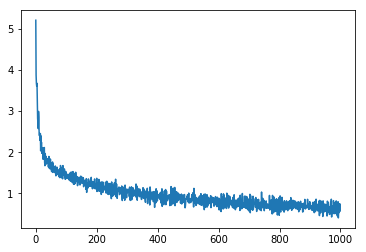

In [206]:
model = ANN([128 , 256 , 7])

model.fit(Xtrain , Ytrain , epochs = 500 , print_period = 100 , batch_sz = 32 , show_fig = True)

In [207]:
Ypred = model.predict(Xtrain)

In [208]:
print(model.score(Xtrain , Ytrain))

0.8235294117647058


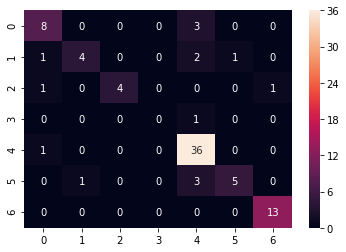

In [209]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

cm = confusion_matrix(Ytrain, Ypred)

sns.heatmap(cm , annot=True)